In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
data = pd.read_csv('Glassdoor_Gender_Pay_Gap.csv')
data.info()
Job=data['JobTitle']
Gender=data['Gender']
Age=data['Age']
PerfEval=data['PerfEval']
Education=data['Education']
Dept=data['Dept']
Seniority=data['Seniority']
BasePay=data['BasePay']
Bonus=data['Bonus']
income=BasePay+Bonus
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   objec

# Preparing data for decision tree

In [4]:
data['income'] = data['BasePay'] + data['Bonus']

## One hot encoding categorical data

In [15]:
x=pd.concat([Education,Job,Gender,PerfEval,Seniority,Dept,Age],axis=1)
x_dummies=pd.get_dummies(x)
x_dummies


,PerfEval,Seniority,Age,Education_College,Education_High School,Education_Masters,Education_PhD,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,...,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate,Gender_Female,Gender_Male,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales
0,5,2,18,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,5,5,21,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,4,5,19,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
3,5,4,20,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,5,5,26,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,61,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
996,1,2,57,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
997,1,1,48,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
998,2,1,65,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0


## Converting income to binary (less than or greater than the 3rd quartile)

<AxesSubplot:ylabel='income'>

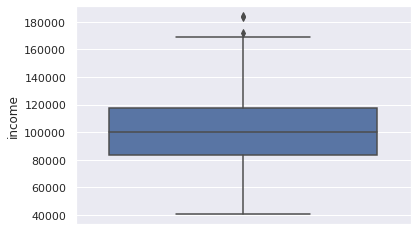

In [8]:
sb.boxplot(y='income', data = data)

In [9]:
Q3Income = data['income'].quantile(0.75)
Q3Income

117656.0

In [10]:
newIncome = pd.DataFrame(data['income'])
newIncome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   income  1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [17]:
# Combining Numeric features with the OHE Categorical features
xData_res = data['income']
xData_ohe = pd.concat([x_dummies, xData_res], 
                           sort = False, axis = 1).reindex(index=xData_res.index)
xData_ohe['income'].values[xData_ohe['income'].values < Q3Income] = False
xData_ohe['income'].values[xData_ohe['income'].values >= Q3Income] = True

# Check the final dataframe
xData_ohe.head()

,PerfEval,Seniority,Age,Education_College,Education_High School,Education_Masters,Education_PhD,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,...,JobTitle_Software Engineer,JobTitle_Warehouse Associate,Gender_Female,Gender_Male,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales,income
0,5,2,18,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,5,5,21,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,4,5,19,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
3,5,4,20,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
4,5,5,26,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


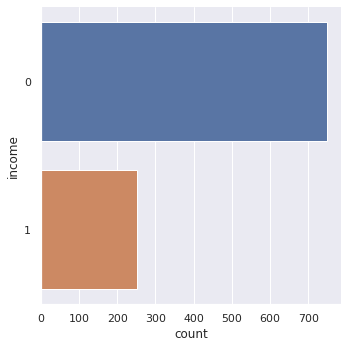

In [19]:
sb.catplot(y = "income", data = xData_ohe, kind = "count")

## Resampling the data

In [20]:
# Upsample Bad to match Good
from sklearn.utils import resample

xData_oheBad = xData_ohe[xData_ohe.income == 0]
xData_oheGood = xData_ohe[xData_ohe.income == 1]
 
# Upsample the Bad samples
xData_ohe_up = resample(xData_oheGood, 
                        replace=True,                     # sample with replacement
                        n_samples=xData_oheBad.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
xData_ohe_up = pd.concat([xData_oheBad, xData_ohe_up])
 
# Check the ratio of the classes
xData_ohe_up['income'].value_counts()
xData_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 0 to 87
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   PerfEval                      1498 non-null   int64
 1   Seniority                     1498 non-null   int64
 2   Age                           1498 non-null   int64
 3   Education_College             1498 non-null   uint8
 4   Education_High School         1498 non-null   uint8
 5   Education_Masters             1498 non-null   uint8
 6   Education_PhD                 1498 non-null   uint8
 7   JobTitle_Data Scientist       1498 non-null   uint8
 8   JobTitle_Driver               1498 non-null   uint8
 9   JobTitle_Financial Analyst    1498 non-null   uint8
 10  JobTitle_Graphic Designer     1498 non-null   uint8
 11  JobTitle_IT                   1498 non-null   uint8
 12  JobTitle_Manager              1498 non-null   uint8
 13  JobTitle_Marketing Associate  1498 

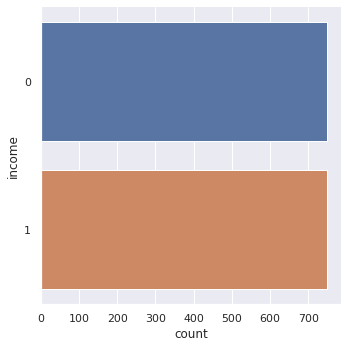

In [21]:
sb.catplot(y = "income", data = xData_ohe_up, kind = "count")

## Decision tree

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(xData_ohe_up['income'])
x = pd.DataFrame(xData_ohe_up.drop('income', axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Train Data
Accuracy  :	 0.8831385642737897

TPR Train :	 0.8803278688524591
TNR Train :	 0.8860544217687075

FPR Train :	 0.11394557823129252
FNR Train :	 0.11967213114754098


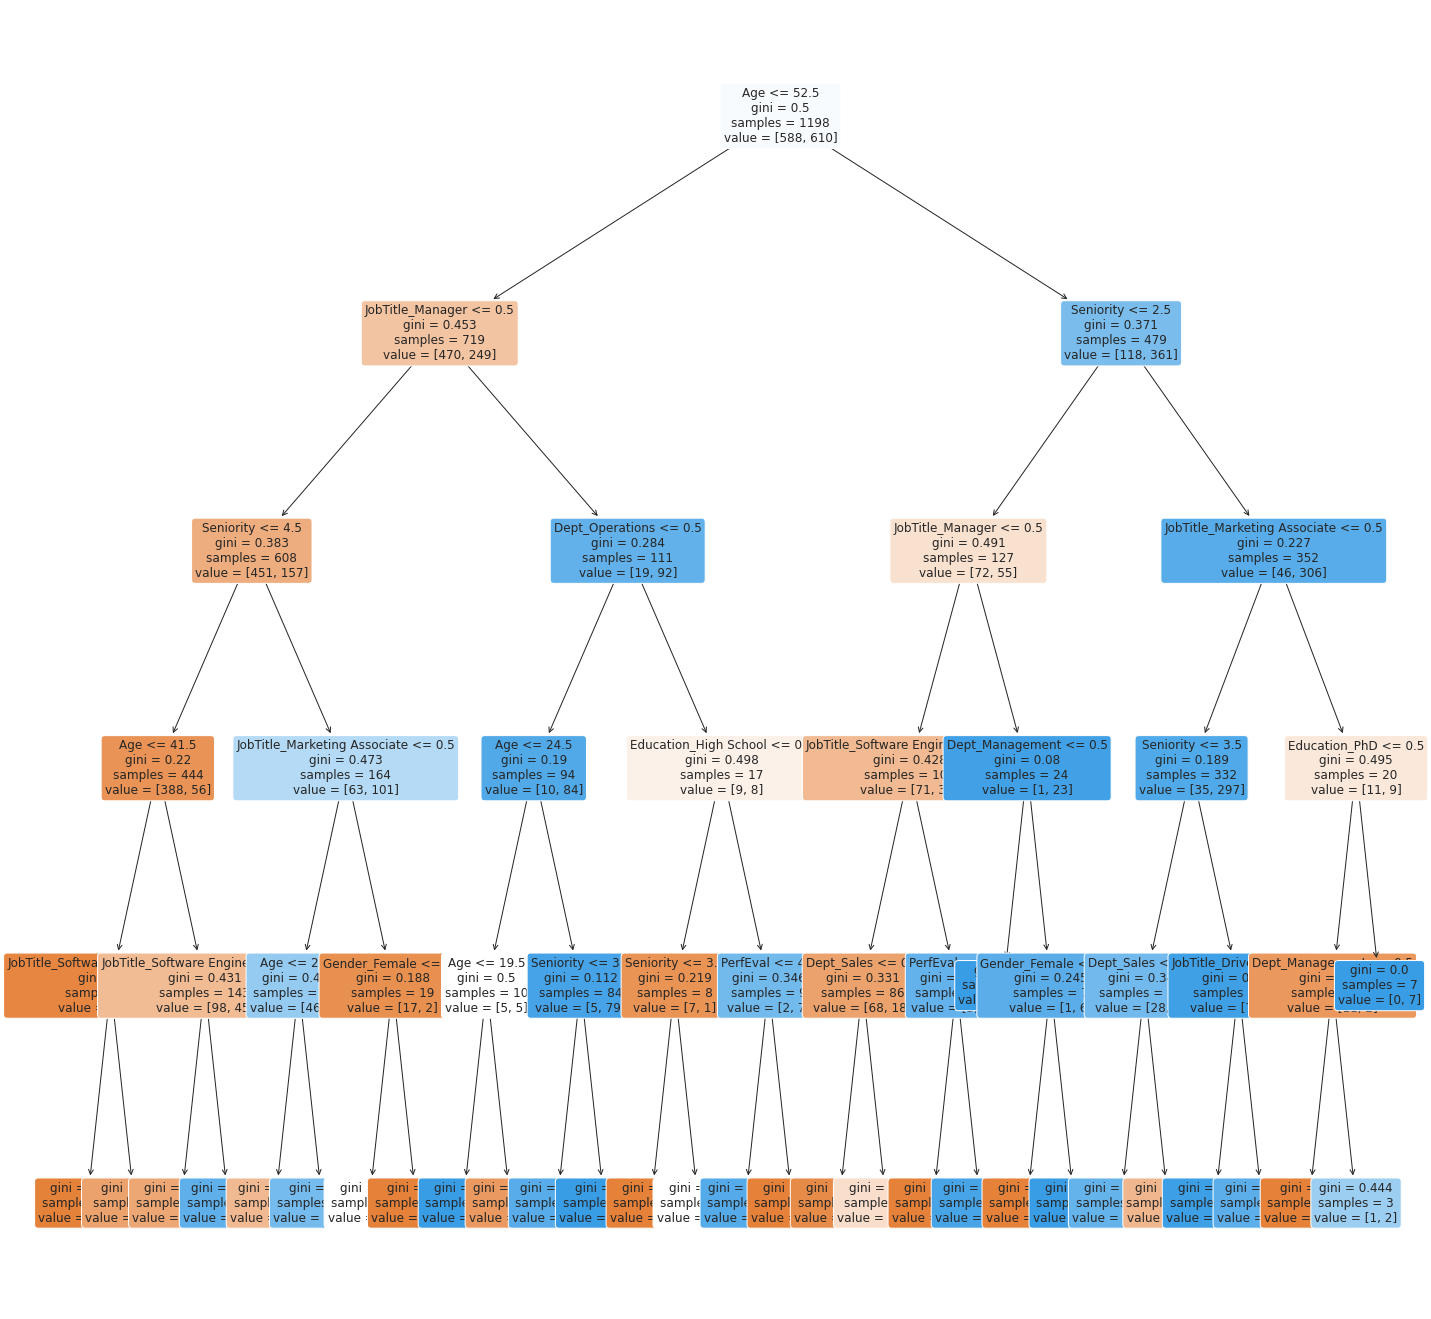

In [ ]:

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth =5)  # change max_depth to experiment
dectree.fit(x_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns,fontsize=12)


# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
#sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           #annot = True, fmt=".0f", annot_kws={"size": 18})

<AxesSubplot:>

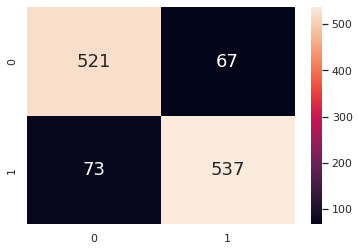

In [ ]:
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
    annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.86

TPR Test :	 0.8561151079136691
TNR Test :	 0.8633540372670807

FPR Test :	 0.13664596273291926
FNR Test :	 0.14388489208633093


<AxesSubplot:>

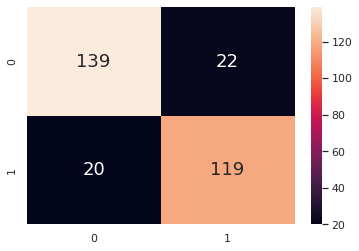

In [ ]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Random forest classifier

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 400,  # n_estimators denote number of trees
                                max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_depth=10, n_estimators=400)

Train Data
Accuracy  :	 0.989983305509182

TPR Train :	 0.9983606557377049
TNR Train :	 0.9812925170068028

FPR Train :	 0.01870748299319728
FNR Train :	 0.001639344262295082


<AxesSubplot:>

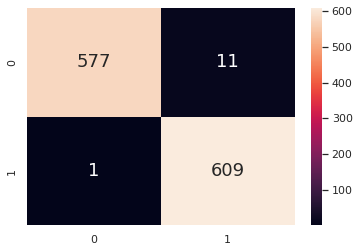

In [ ]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.95

TPR Test :	 1.0
TNR Test :	 0.906832298136646

FPR Test :	 0.09316770186335403
FNR Test :	 0.0


<AxesSubplot:>

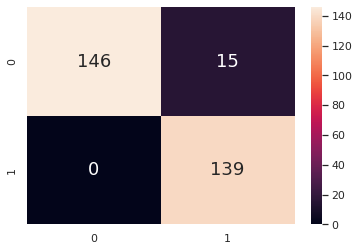

In [ ]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [ ]:
!pip install xgboost==1.6.0

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## XGBoost classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [ ]:

model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing="NaN",
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
              

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, grow_policy=None,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_bin=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=6, max_leaves=None,
              min_child_weight=1, missing='NaN', monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', predictor=None, random_state=0,
              reg_alpha=0, ...)

In [ ]:
y_train_pred = model.predict(x_train)
y_train_pred

array([0, 0, 1, ..., 0, 0, 0])

Train Data
Accuracy  :	 1.0

TPR Train :	 1.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0


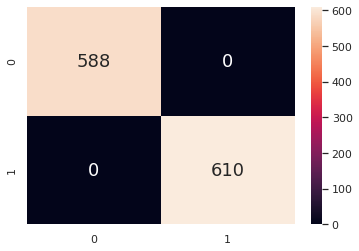

In [ ]:
print("Train Data")
print("Accuracy  :\t",  accuracy_score(y_train, y_train_pred))
print()

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(fpTrain + tnTrain)))
print("FNR Train :\t", (fnTrain/(fnTrain + tpTrain)))

In [ ]:
y_test_pred = model.predict(x_test)
y_test_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

Test Data
Accuracy  :	 0.9466666666666667

TPR Test :	 1.0
TNR Test :	 0.9006211180124224

FPR Test :	 0.09937888198757763
FNR Test :	 0.0


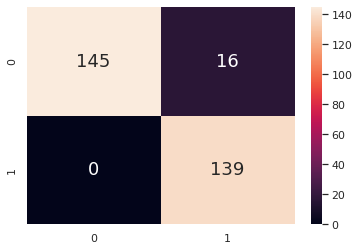

In [ ]:
print("Test Data")
print("Accuracy  :\t",  accuracy_score(y_test, y_test_pred))
print()

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))